In [ ]:
import zipfile

zip_path = "PROJET_SCOLAIRE.zip"  # Chemin du fichier zip importé
extract_path = "/content/"  # Chemin où extraire le contenu du zip

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


normalisation des images

In [ ]:
import os
import cv2

# Chemin du dossier contenant les images à normaliser
input_dir = r"/content/PROJET_SCOLAIRE/images_normalisées"

# Chemin du dossier de sortie pour les images normalisées
output_dir = r"/content/PROJET_SCOLAIRE/images_normalisées"

# Dimensions cibles pour les images normalisées
target_size = (512, 512)

# Itération sur les fichiers dans le dossier d'entrée
for filename in os.listdir(input_dir):
    print("Traitement de l'image", filename)
    # Charger l'image avec OpenCV
    img = cv2.imread(os.path.join(input_dir, filename))

    # Normaliser la taille de l'image
    img = cv2.resize(img, target_size)

    # Convertir les couleurs en float entre 0 et 1
    img = img.astype('float32') / 255.0

    # Enregistrer l'image normalisée dans le dossier de sortie
    output_path = os.path.join(output_dir, filename)
    try:
        _, buffer = cv2.imencode('.jpg',img)
        buffer.tofile(output_path)
        print("Image traitée avec succès et enregistrée sous", output_path)
    except cv2.error as e:
        print(f"Erreur lors de l'enregistrement de l'image {filename} :", e)


Création des labels

In [ ]:
import os


# Chemin du dossier contenant les sous-dossiers de figures
dossier_figures = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\figures"

# Chemin du fichier de sortie
chemin_fichier_sortie = r"C:\PAUL VALERY 3\PROJET_SCOLAIRE\labels_figures.txt"

# Ouvrir le fichier de sortie en mode écriture
fichier_sortie = open(chemin_fichier_sortie, 'w')

# Parcourir tous les sous-dossiers
for nom_sous_dossier in os.listdir(dossier_figures):
    chemin_sous_dossier = os.path.join(dossier_figures, nom_sous_dossier)
    # Vérifier si l'élément est un dossier
    if os.path.isdir(chemin_sous_dossier):
        # Parcourir toutes les images dans le sous-dossier
        for nom_image in os.listdir(chemin_sous_dossier):
            chemin_image = os.path.join(chemin_sous_dossier, nom_image)
            # Écrire le nom de l'image et le label dans le fichier de sortie
            ligne = f"{nom_image},{nom_sous_dossier}\n"
            fichier_sortie.write(ligne)

# Fermer le fichier de sortie
fichier_sortie.close()

print("Création du fichier de labels terminée.")


Création du fichier de labels terminée.


Descriteur hog

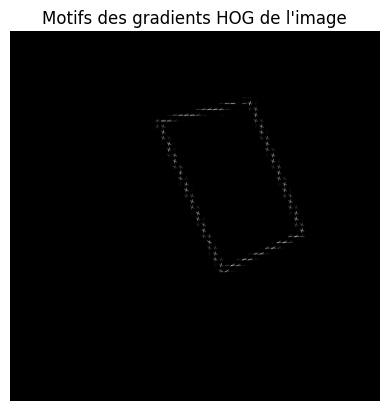

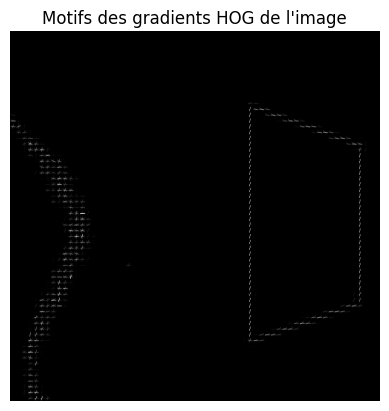

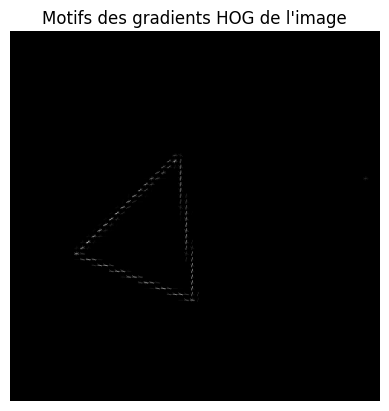

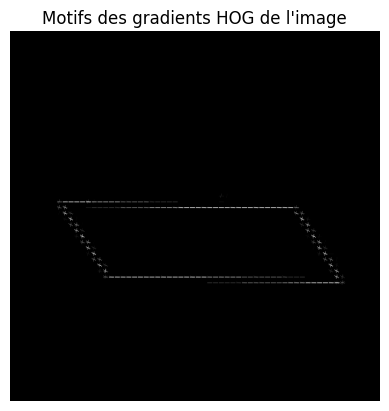

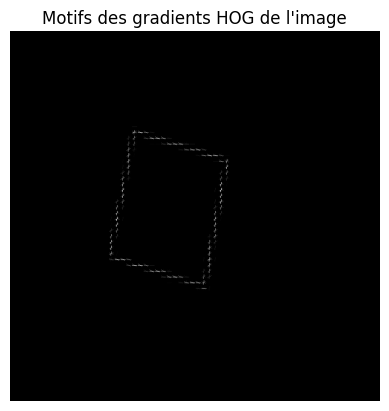

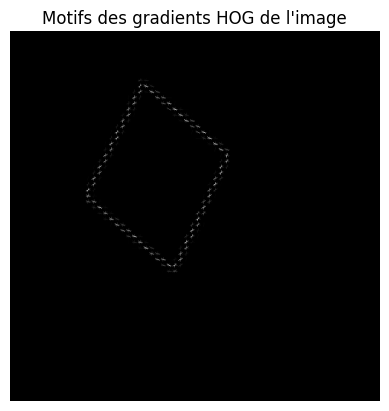

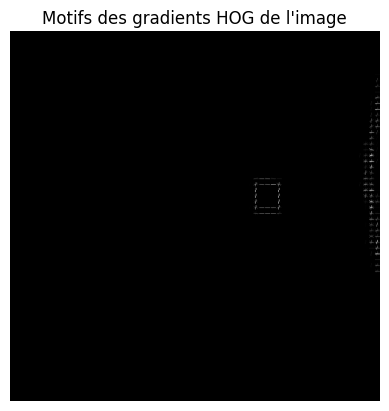

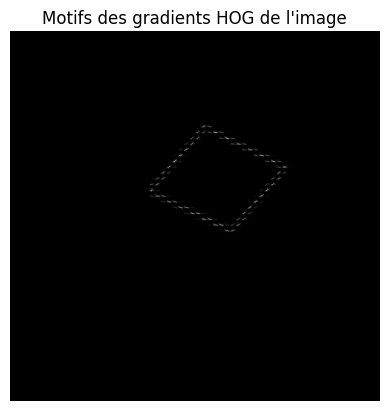

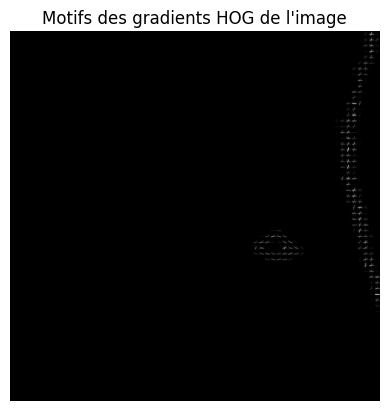

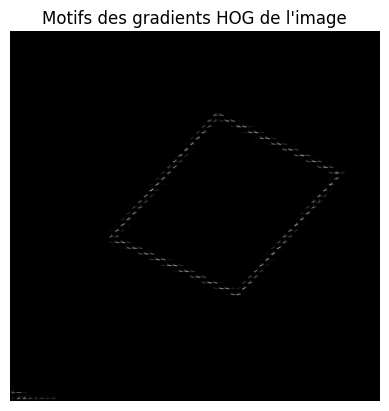

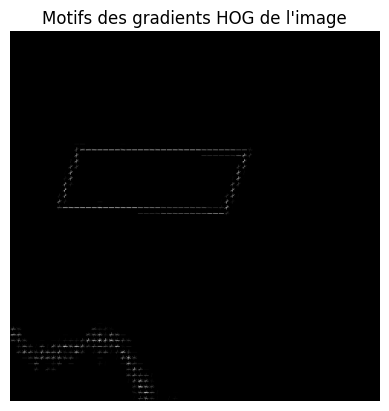

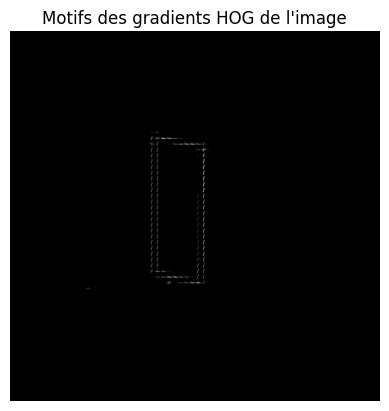

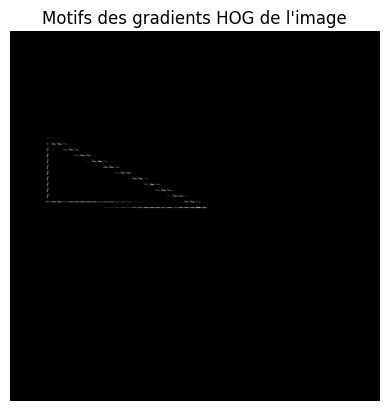

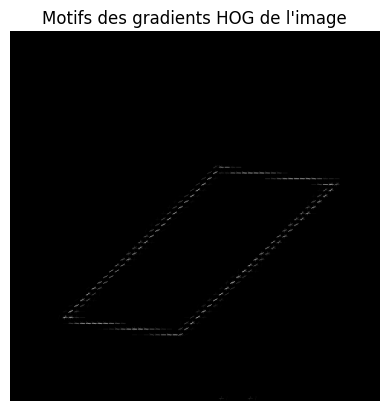

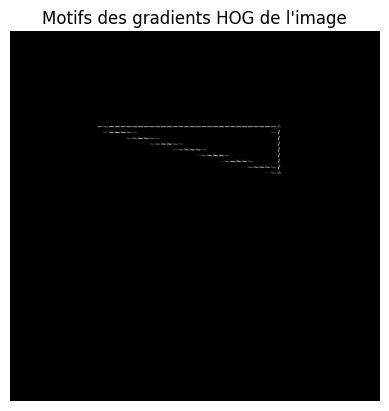

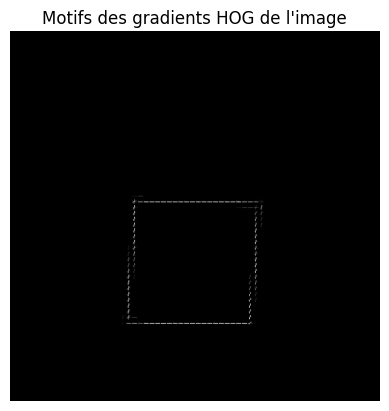

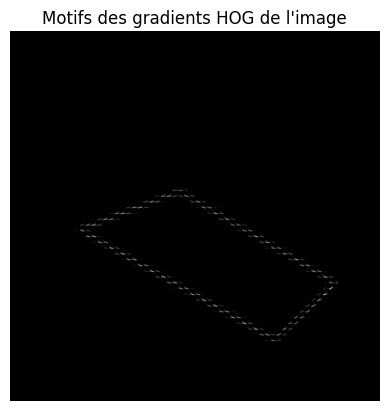

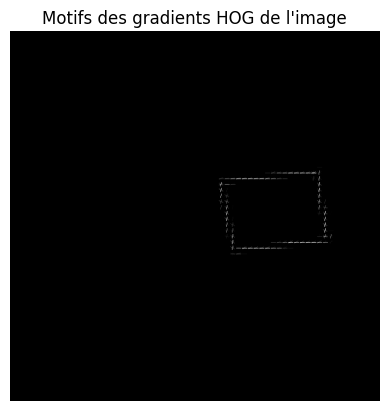

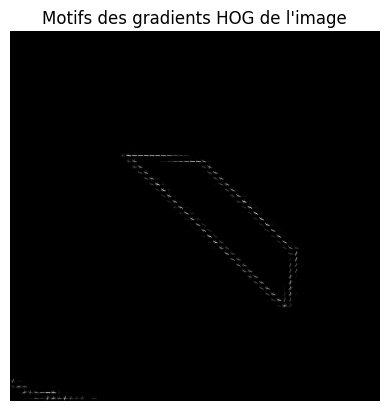

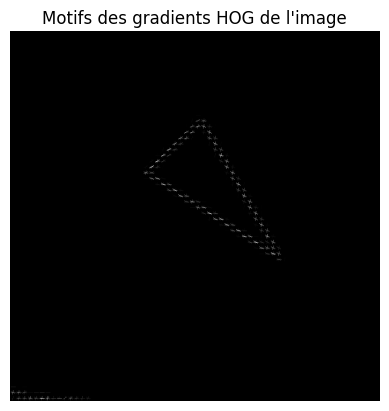

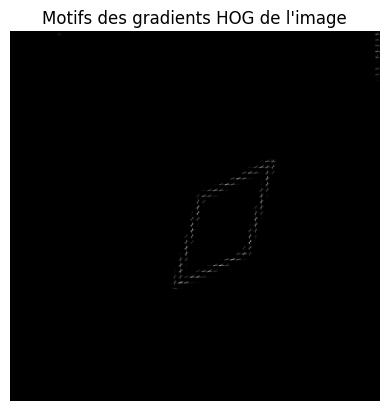

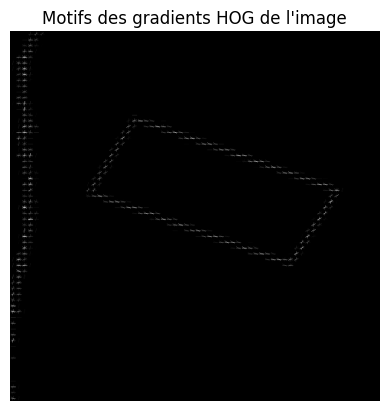

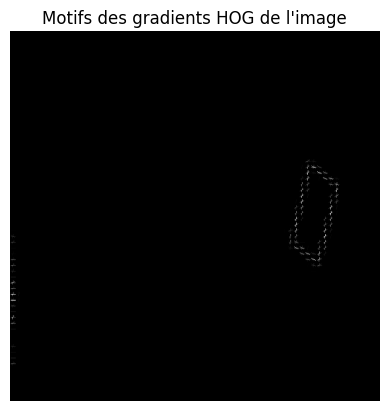

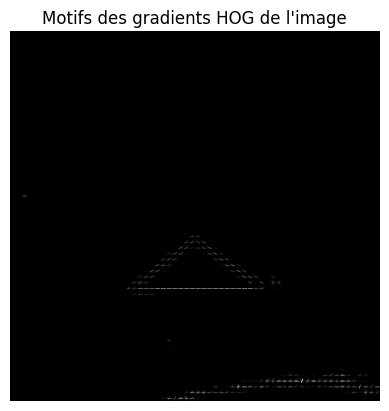

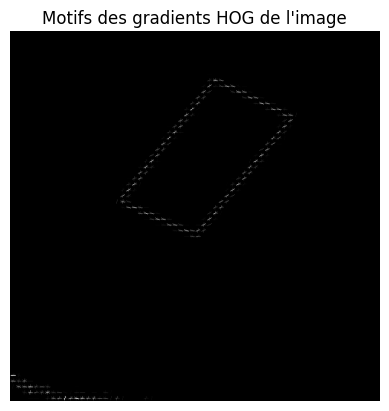

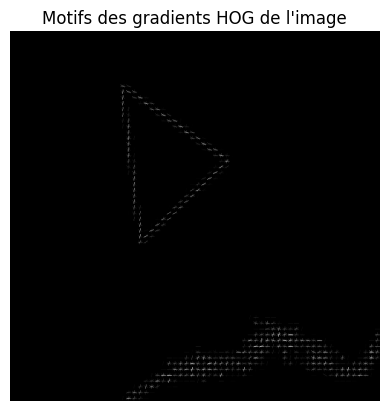

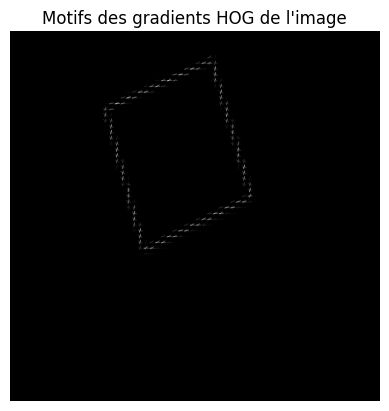

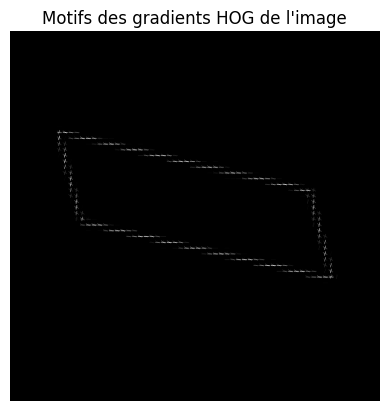

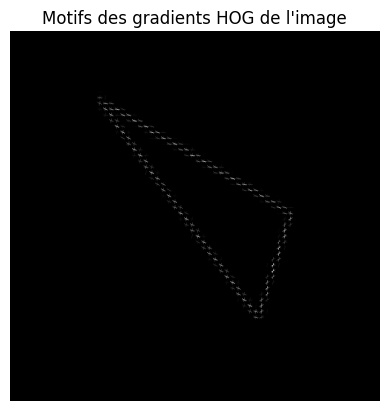

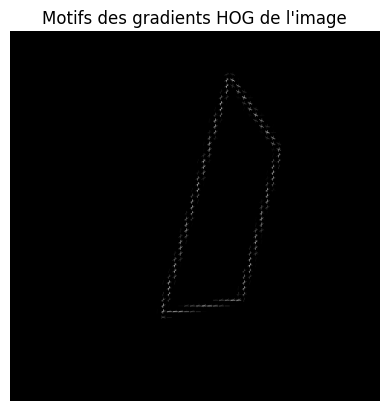

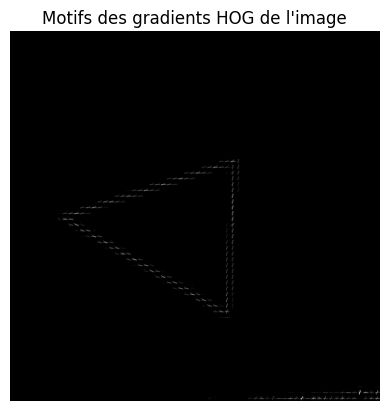

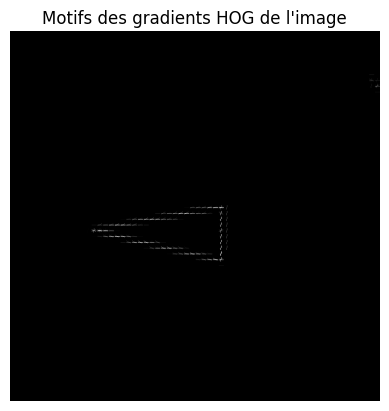

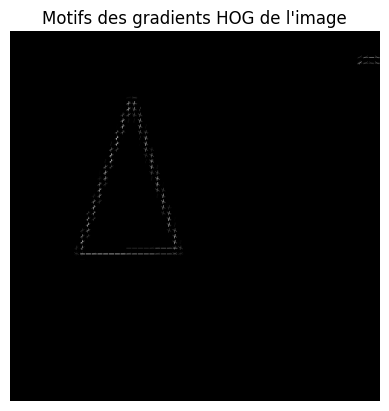

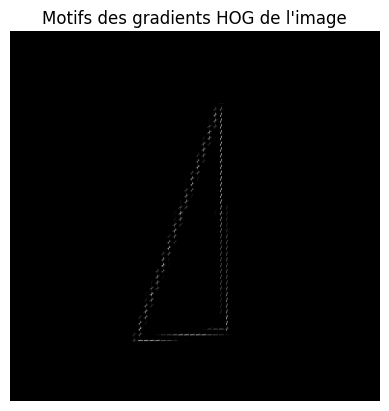

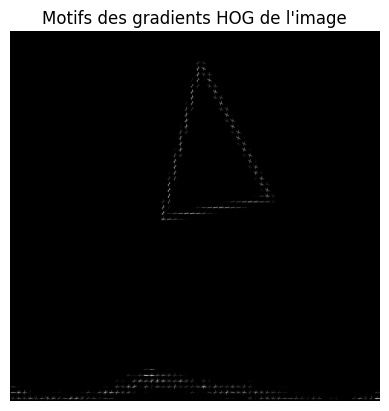

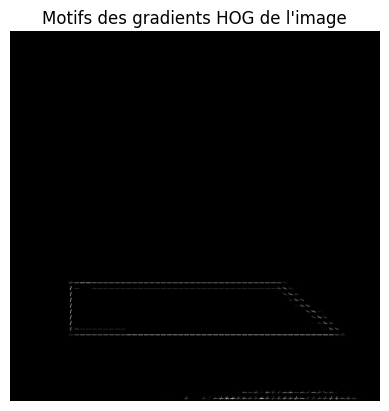

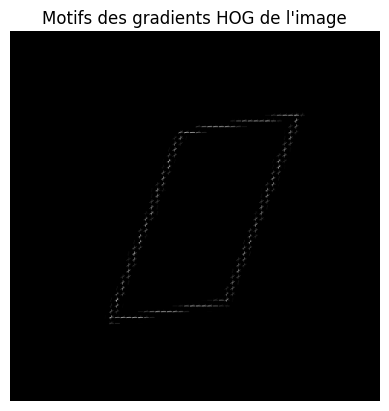

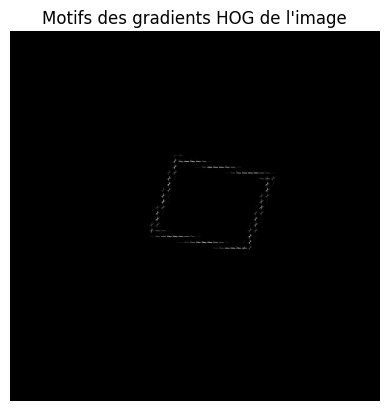

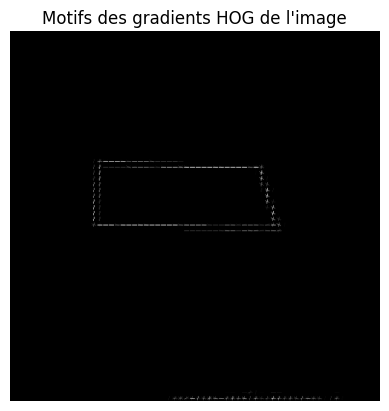

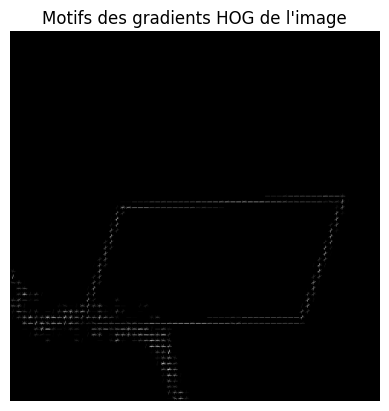

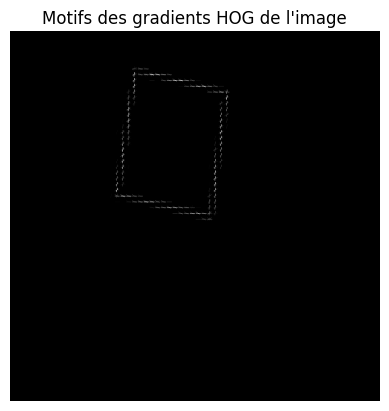

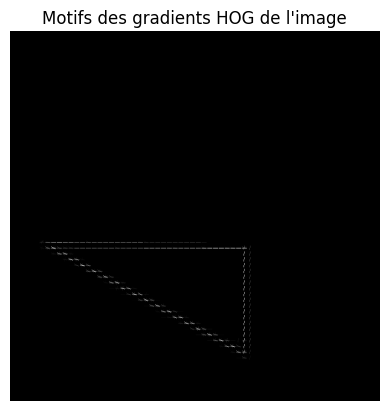

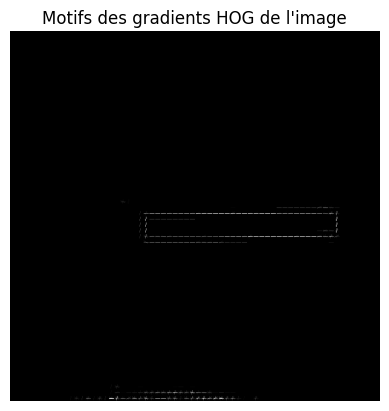

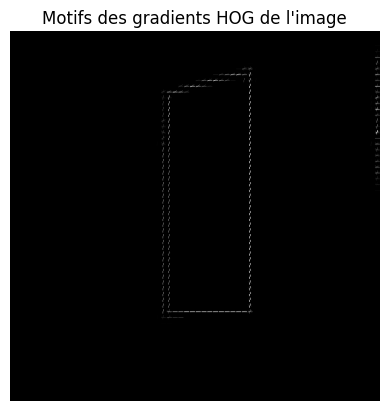

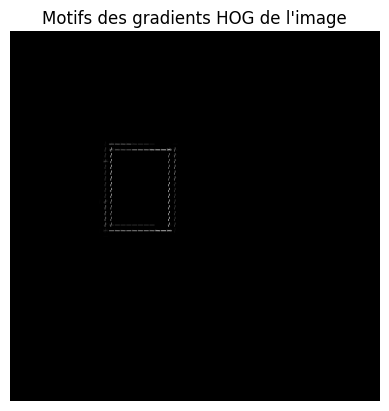

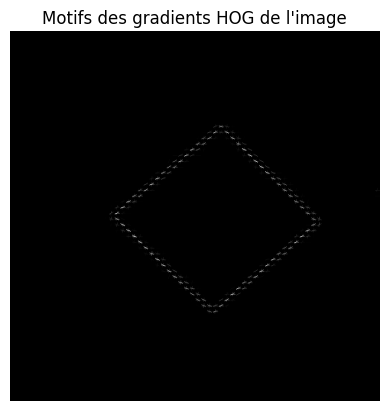

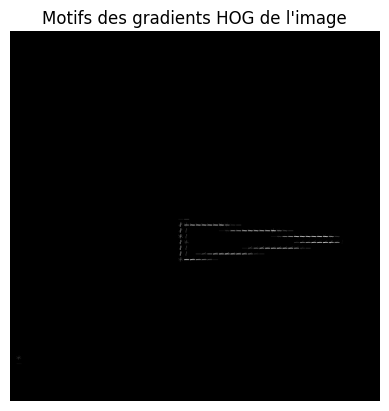

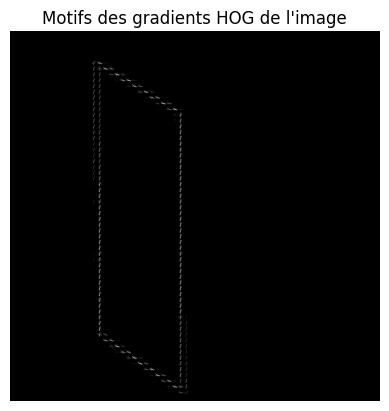

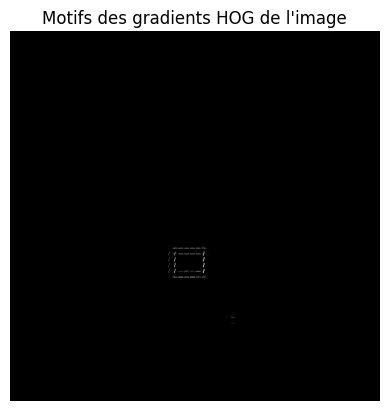

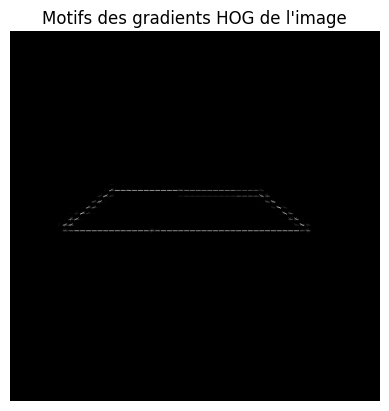

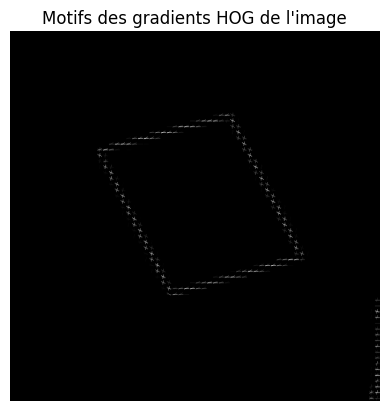

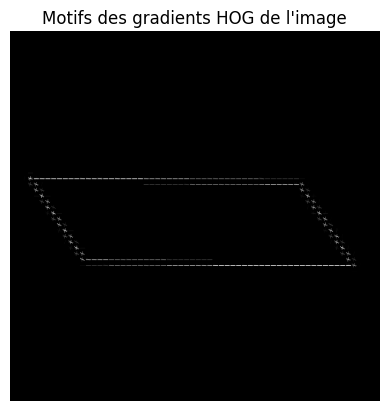

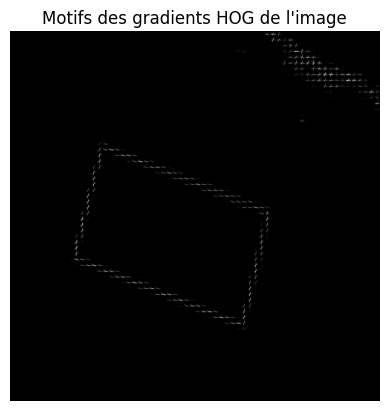

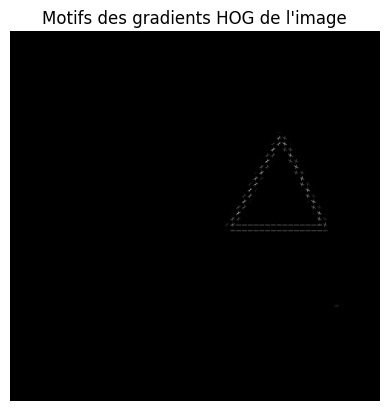

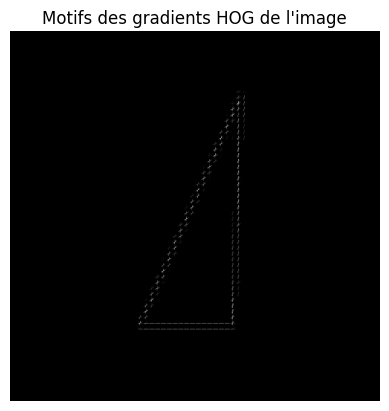

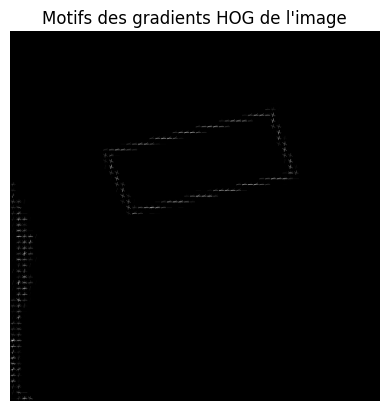

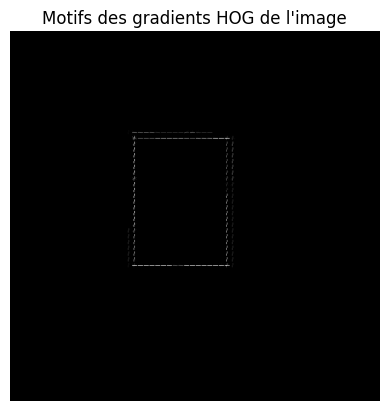

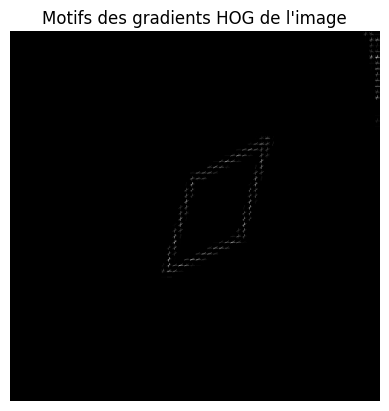

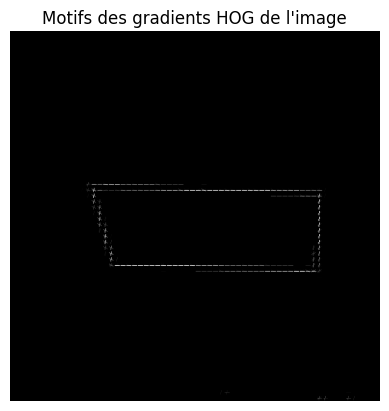

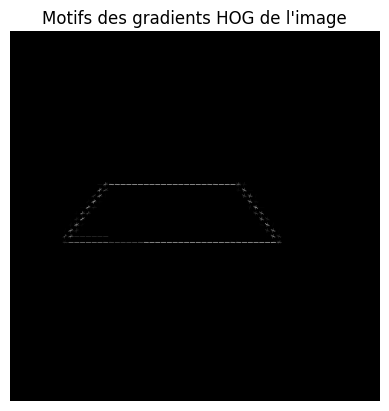

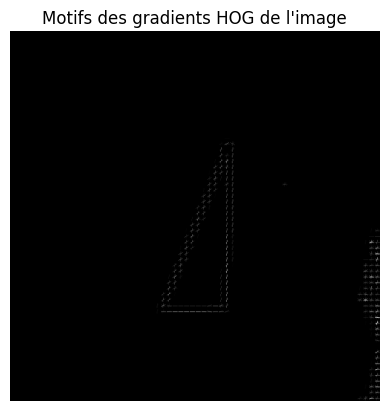

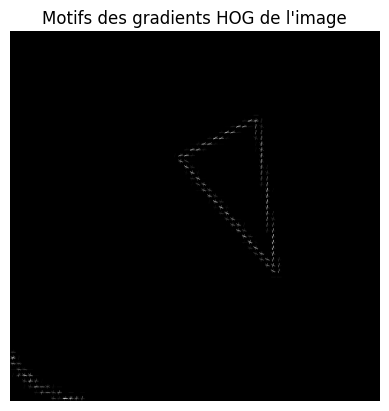

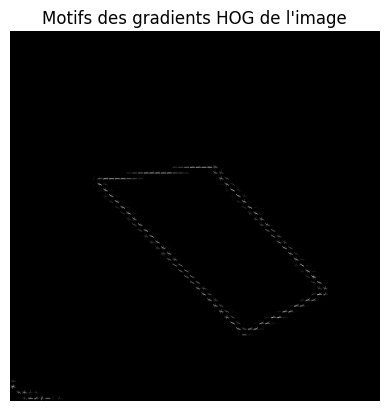

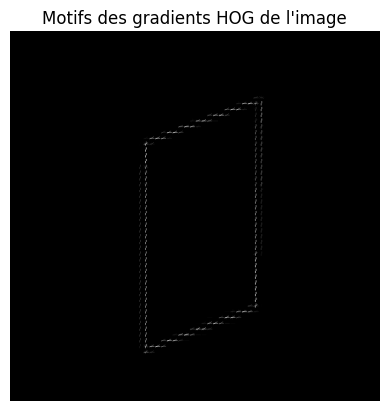

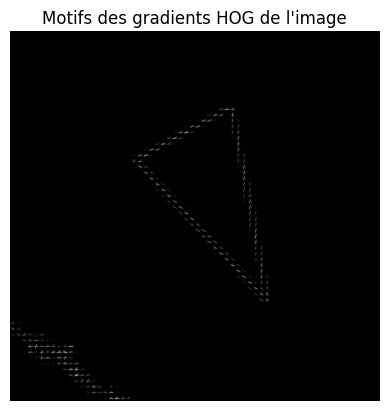

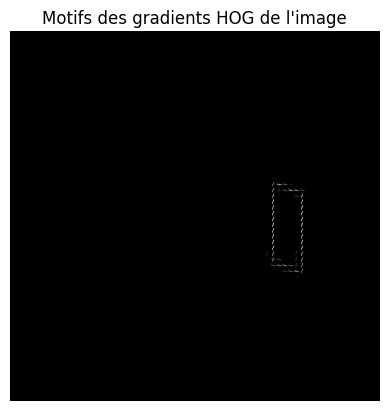

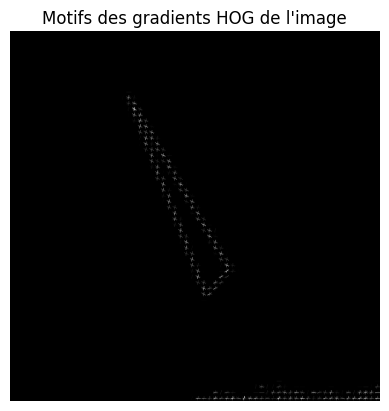

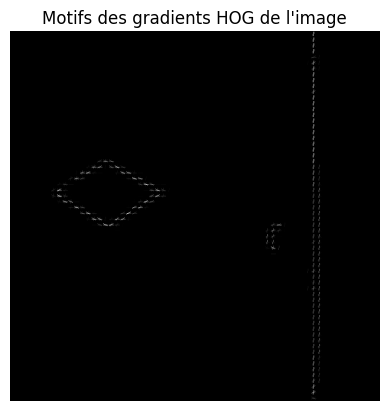

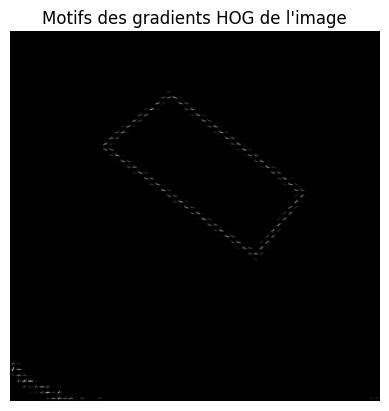

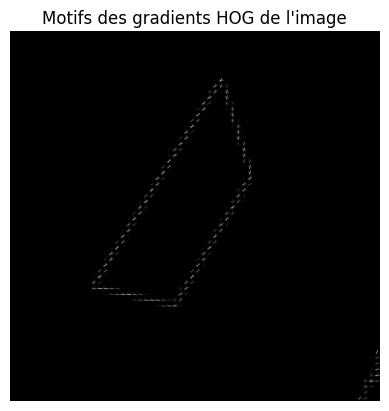

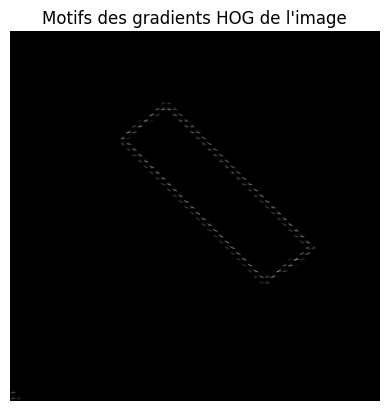

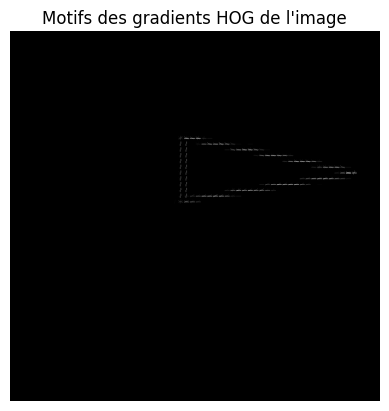

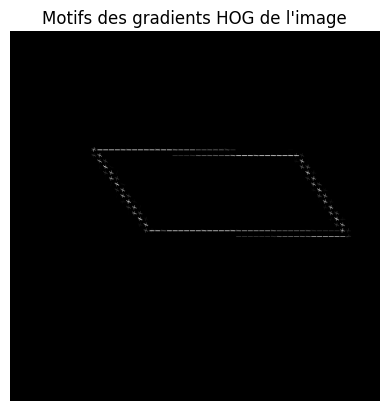

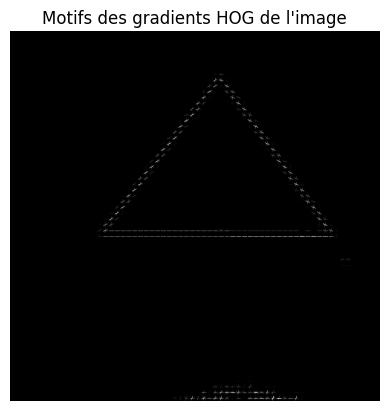

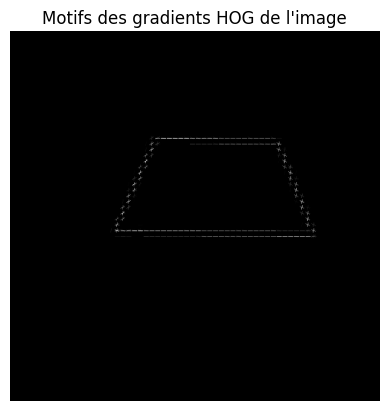

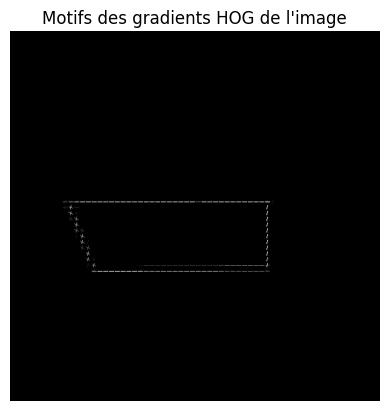

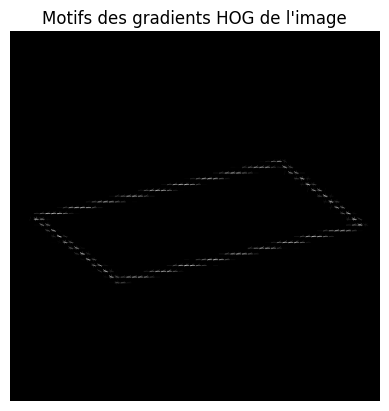

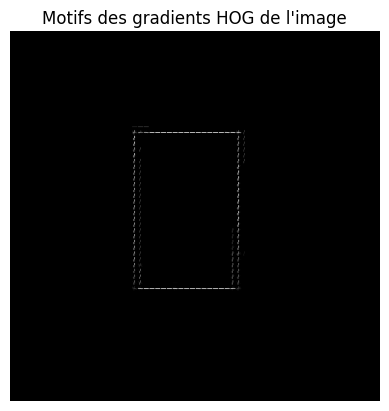

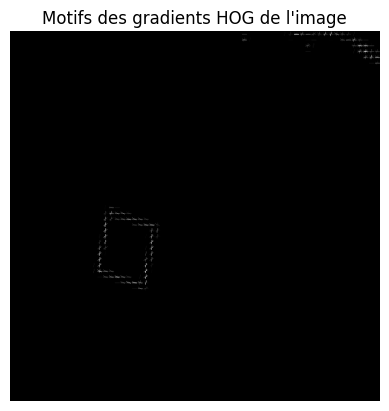

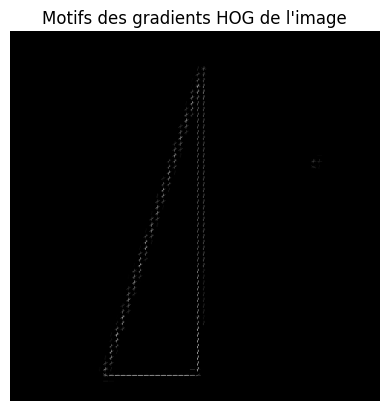

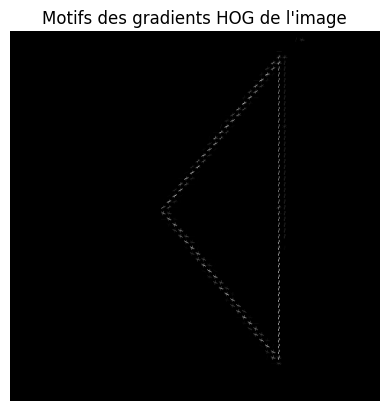

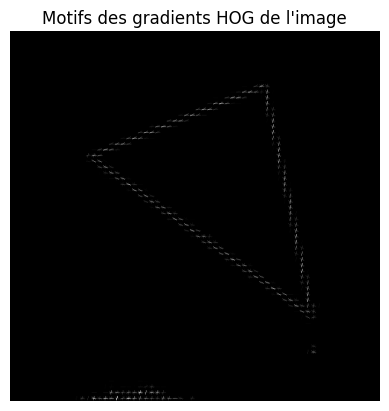

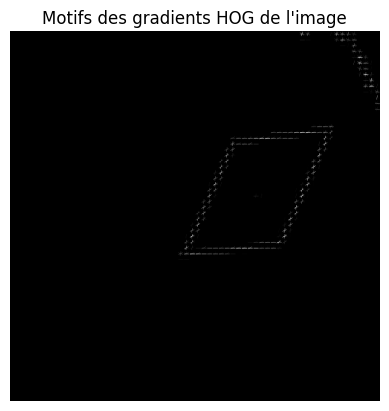

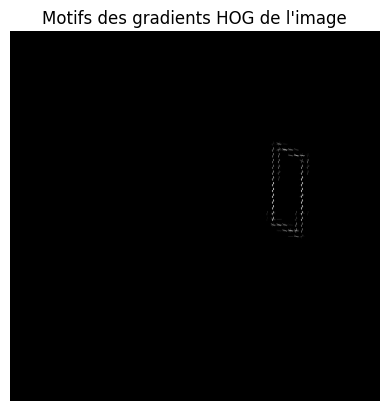

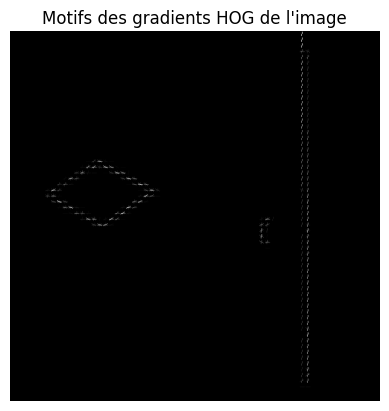

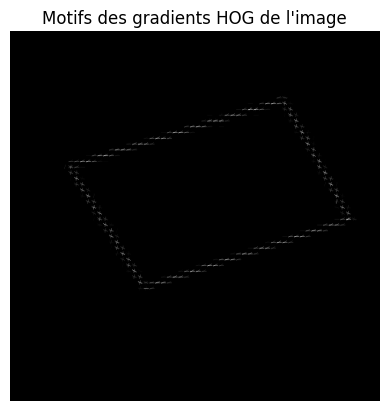

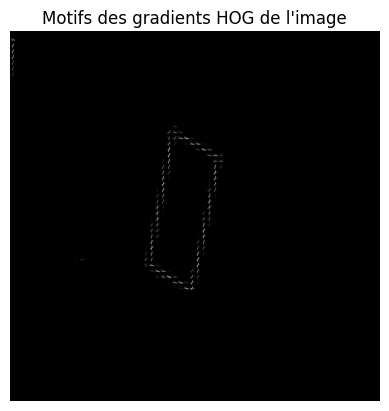

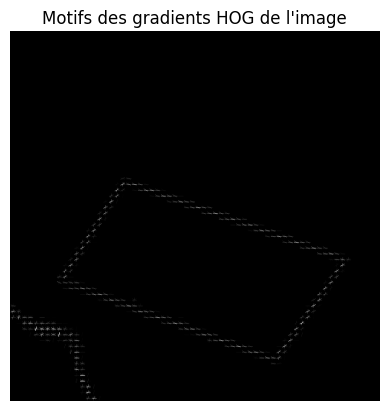

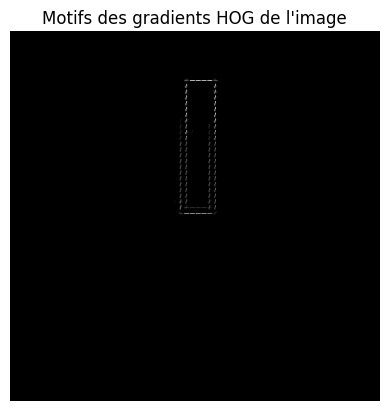

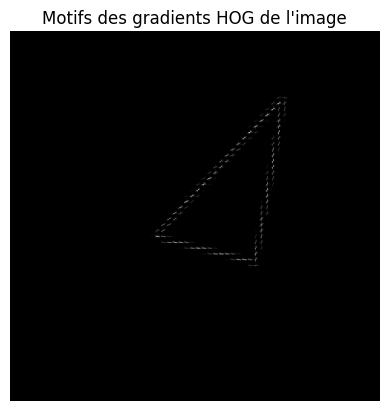

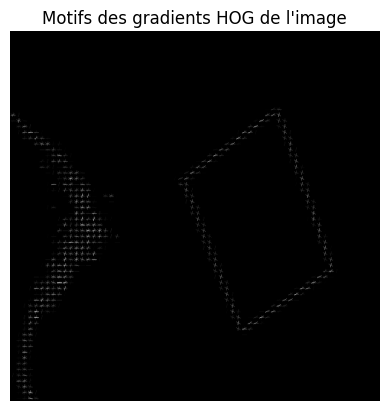

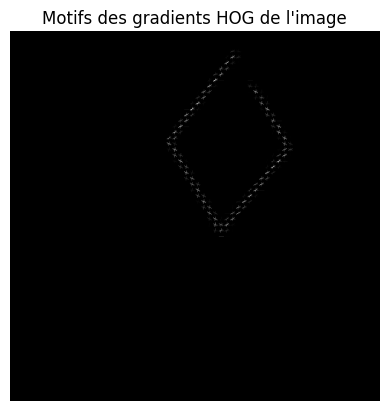

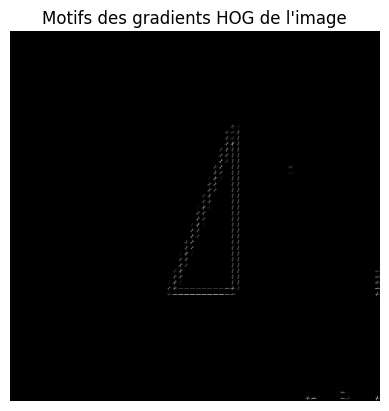

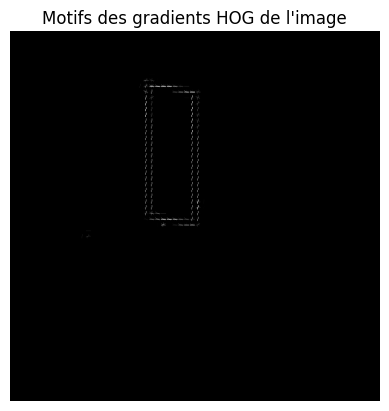

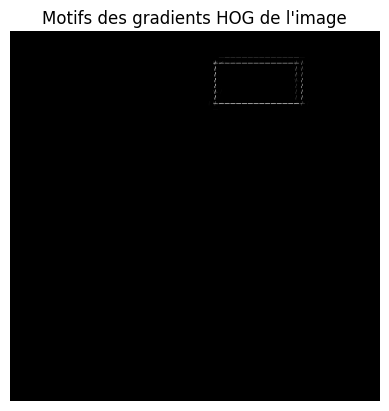

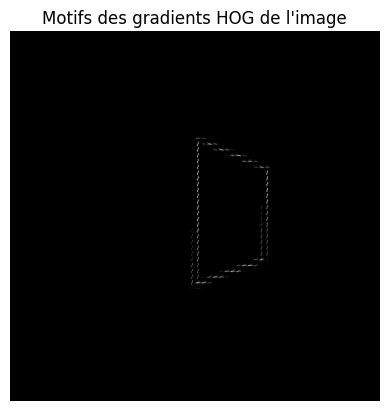

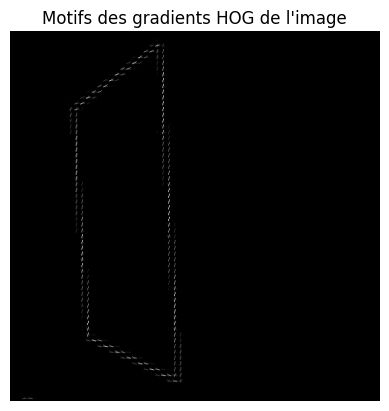

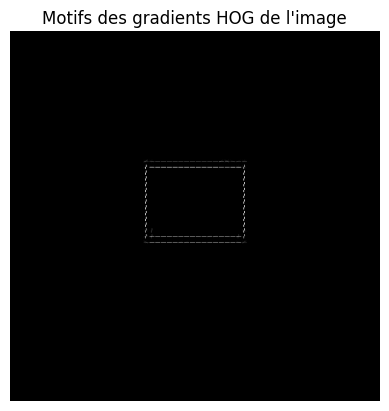

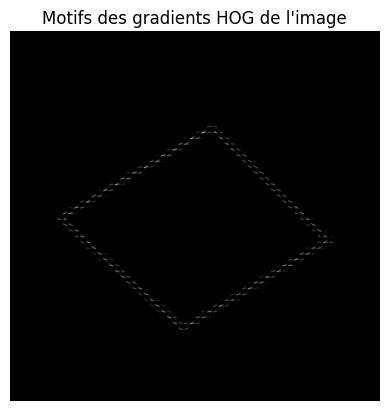

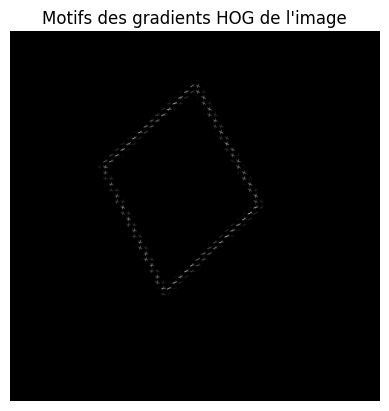

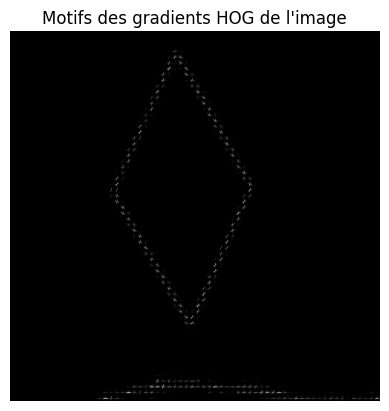

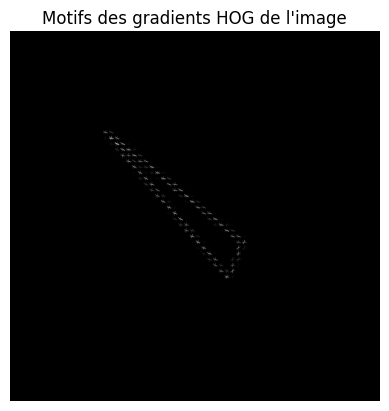

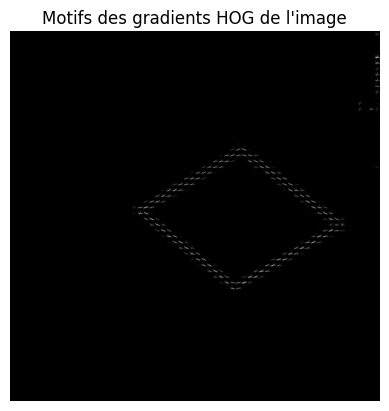

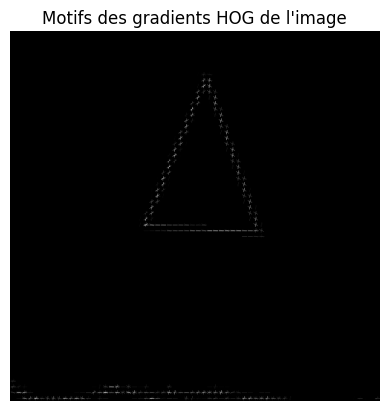

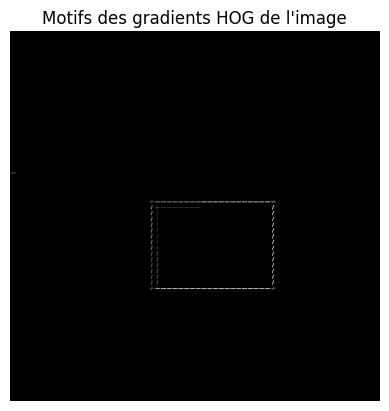

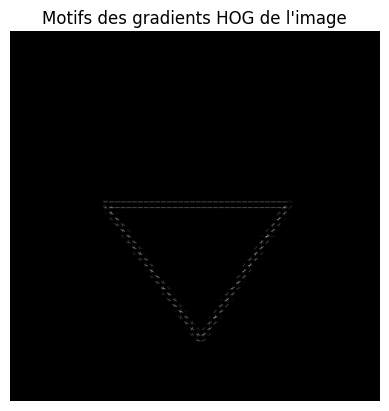

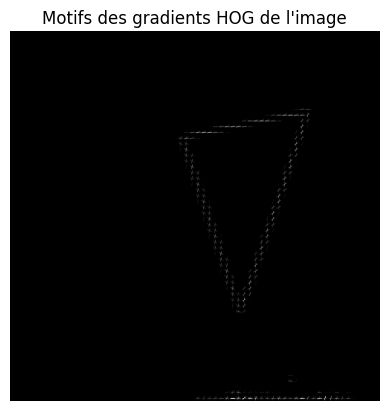

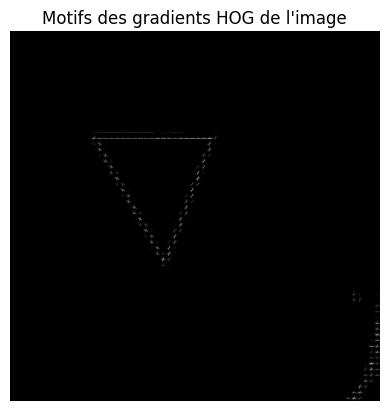

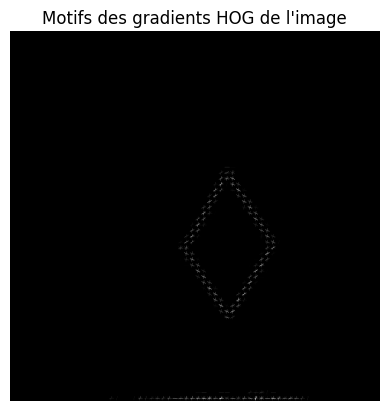

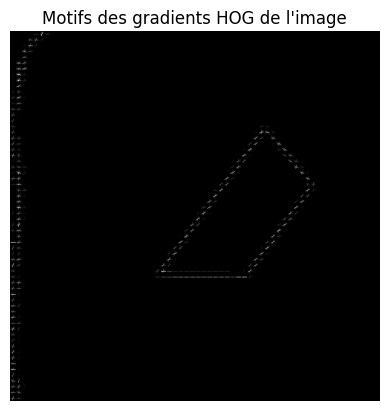

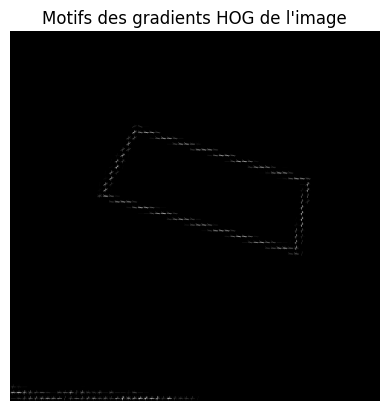

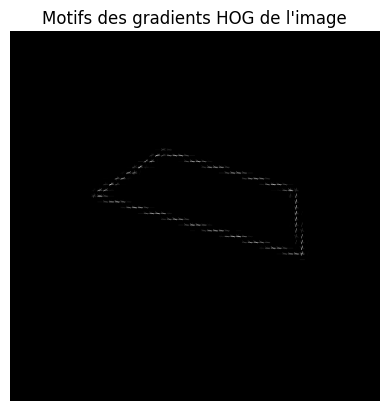

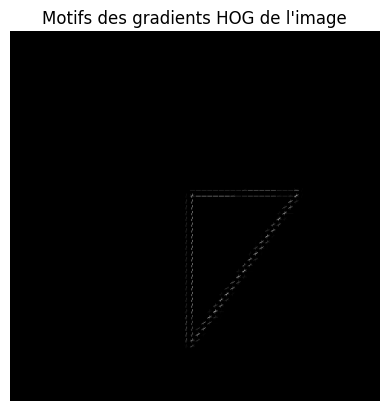

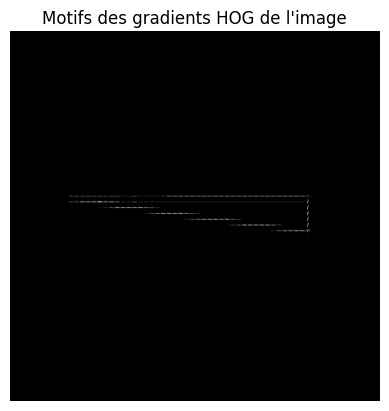

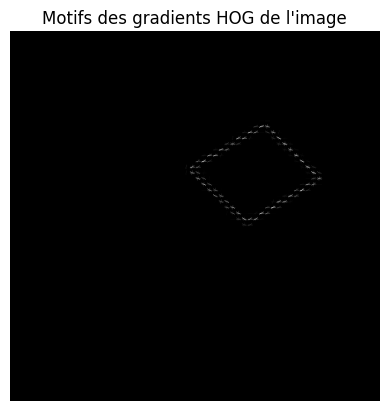

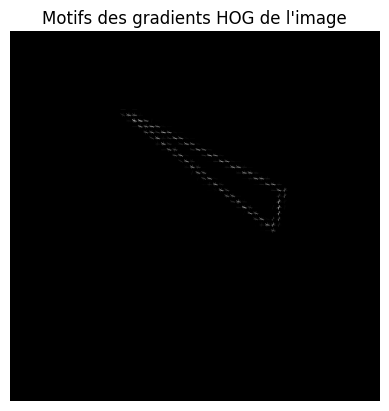

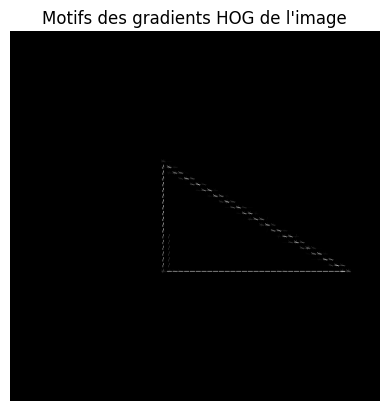

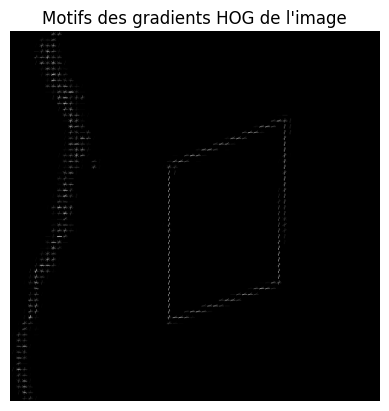

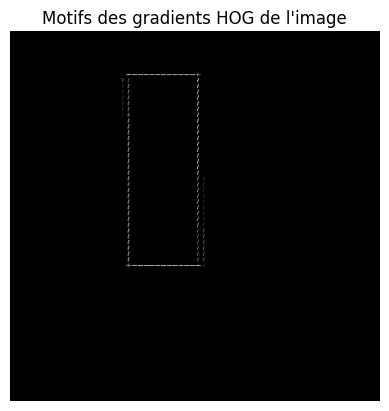

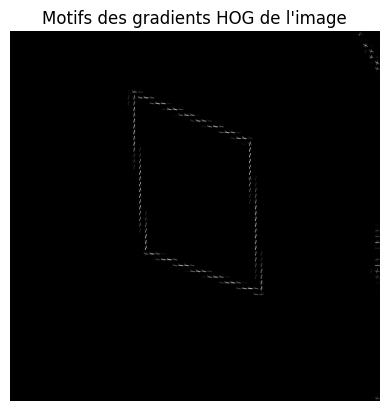

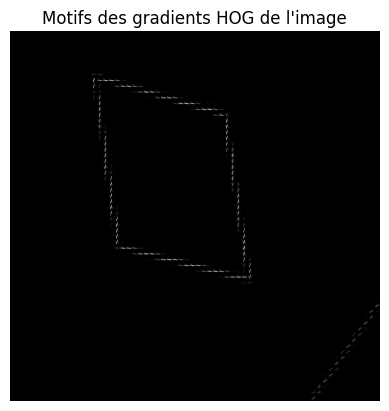

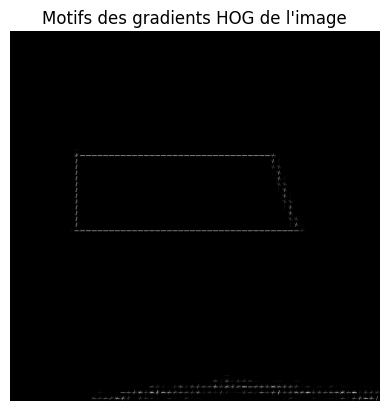

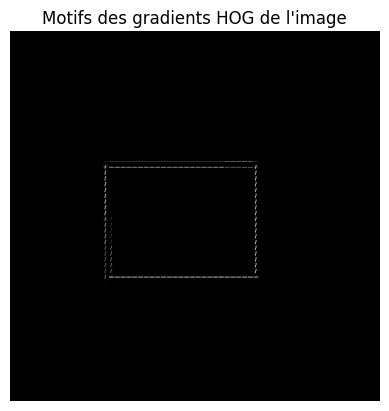

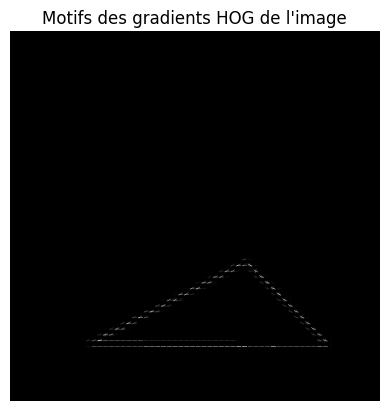

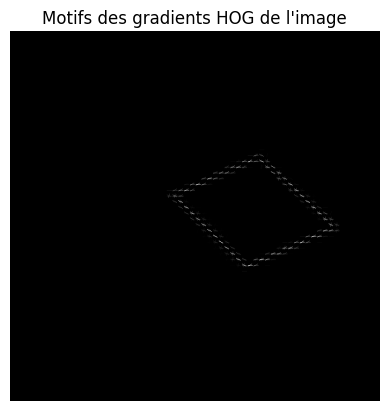

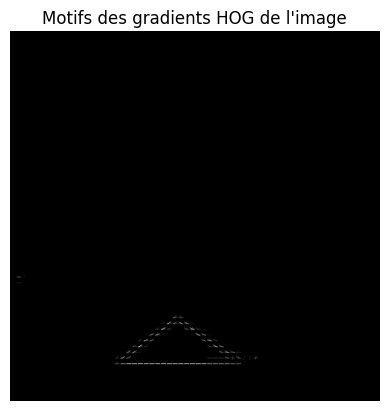

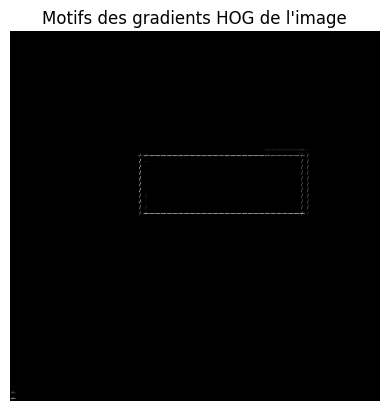

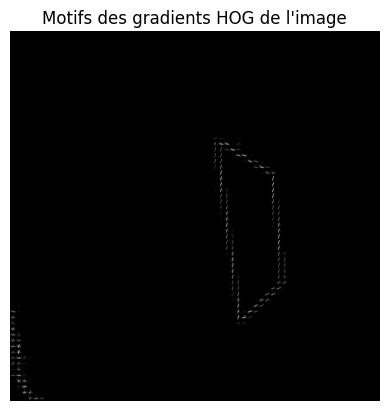

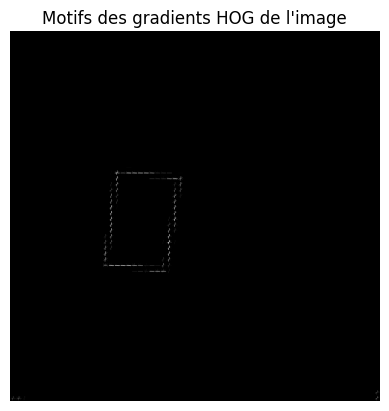

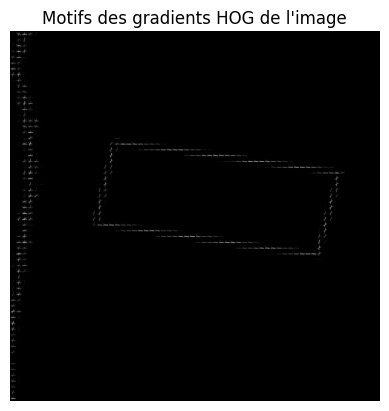

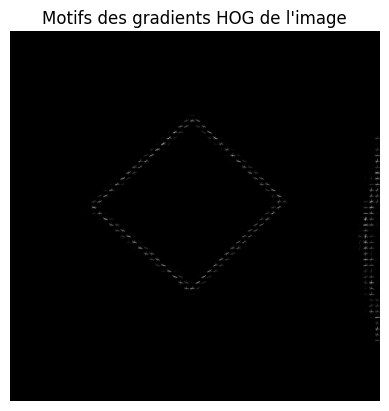

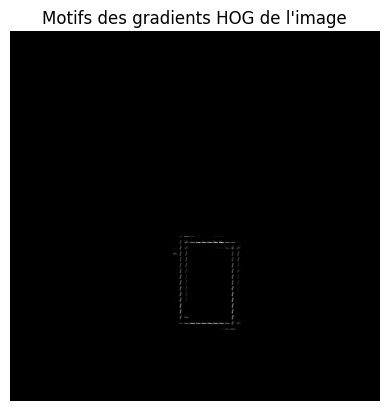

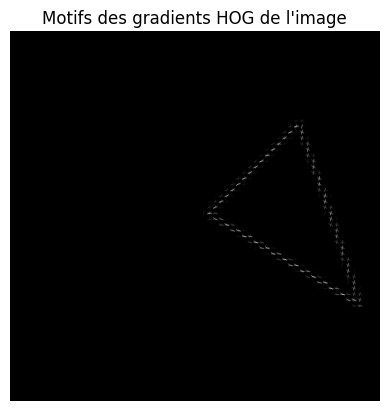

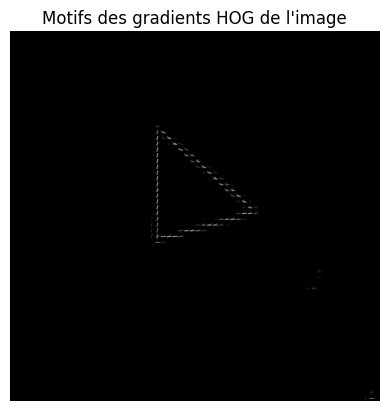

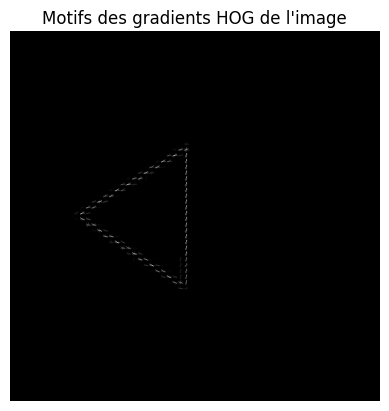

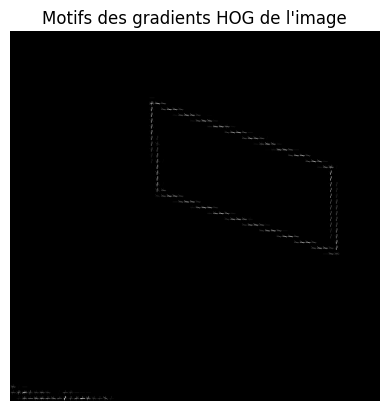

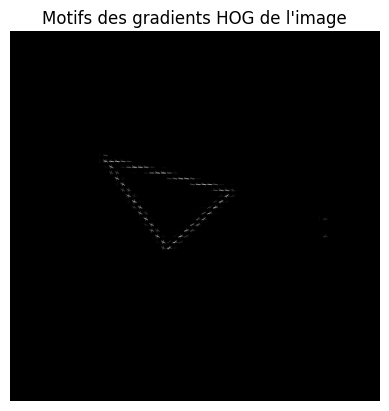

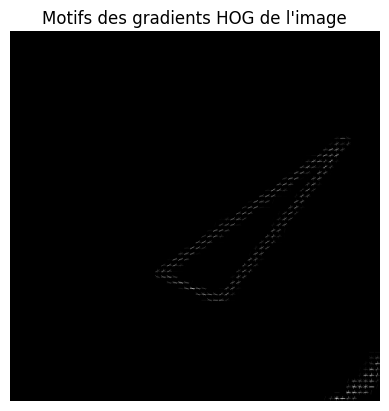

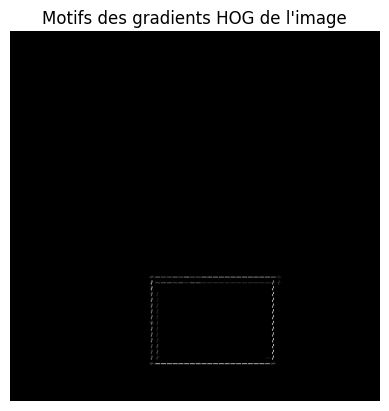

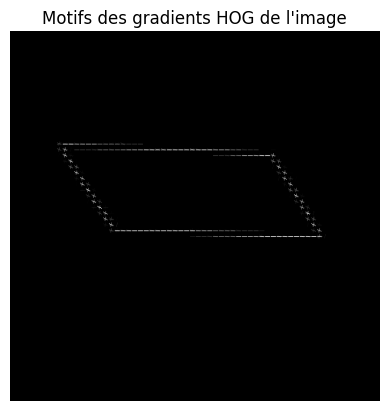

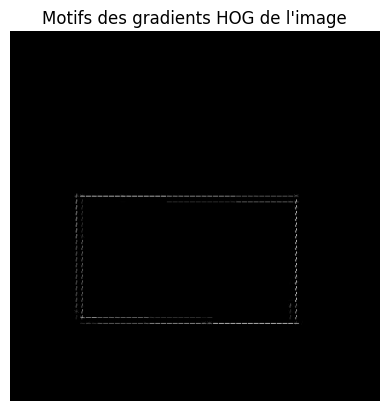

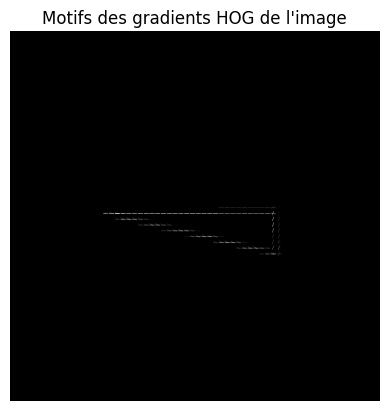

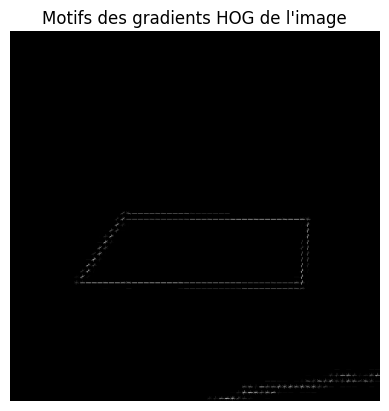

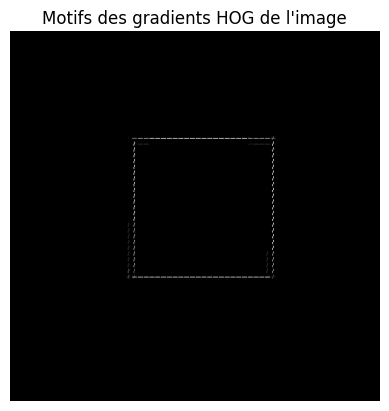

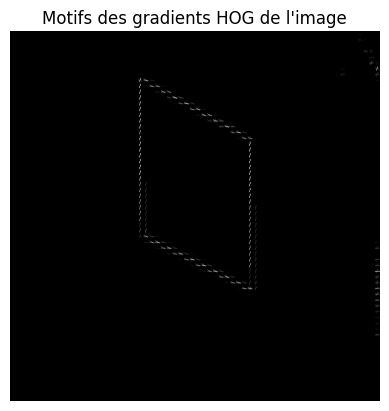

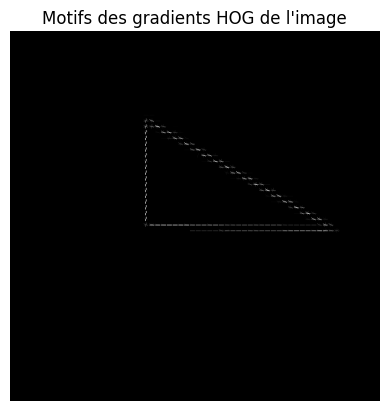

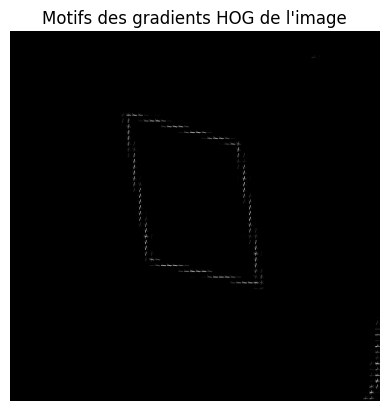

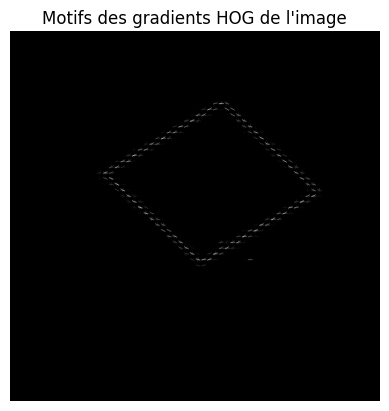

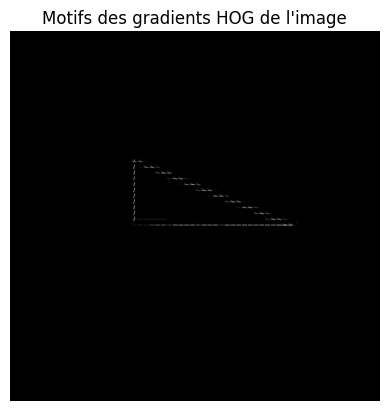

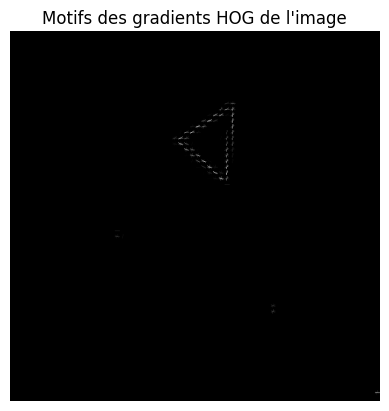

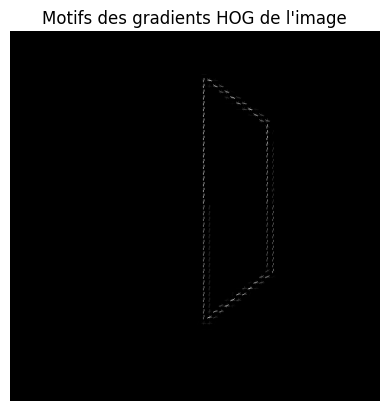

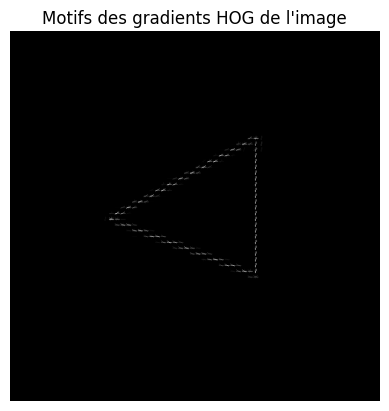

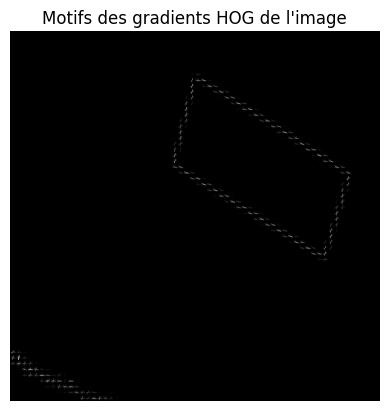

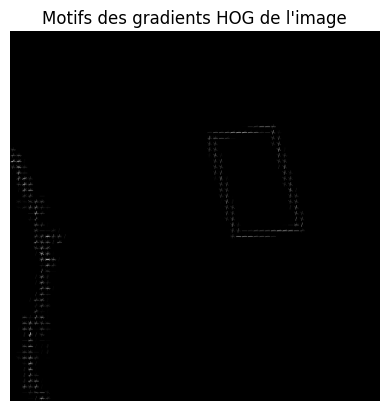

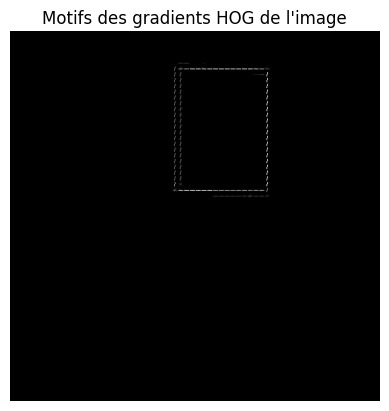

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color


# Chemin du dossier contenant les images normalisées
dossier_images = r"/content/PROJET_SCOLAIRE/images_normalisées"

# Paramètres du descripteur HOG
win_size = (512, 512)  # Taille de la fenêtre pour le calcul des gradients
block_size = (128, 128)  # Taille du bloc pour la normalisation des gradients
block_stride = (128, 128)  # Pas du bloc
cell_size = (8, 8)  # Taille de la cellule pour le calcul des gradients
num_bins = 9  # Nombre de bins dans l'histogramme

# Liste pour stocker les noms des images et les vecteurs de caractéristiques HOG
images_et_caracteristiques = []
vecteurs_caracteristiques=[]

# Parcourir toutes les images dans le dossier
for nom_image in os.listdir(dossier_images):
    chemin_image = os.path.join(dossier_images, nom_image)
    # Charger l'image avec Pillow
    image = Image.open(chemin_image)

    # Convertir l'image en niveaux de gris
    image_gris = color.rgb2gray(np.array(image))

    # Calculer les caractéristiques HOG pour l'image en niveaux de gris
    vecteur_caracteristique, hog_image = hog(image_gris, orientations=num_bins, pixels_per_cell=cell_size,
                                             cells_per_block=tuple(b // c for b, c in zip(block_size, cell_size)),
                                             block_norm='L2-Hys', visualize=True, transform_sqrt=True)
    # Ajouter le nom de l'image et son vecteur de caractéristiques à la liste
    images_et_caracteristiques.append((nom_image, vecteur_caracteristique))
    vecteurs_caracteristiques.append(vecteur_caracteristique)
    # Afficher l'image des motifs de gradients
    plt.imshow(hog_image, cmap='gray')
    plt.axis('off')
    plt.title('Motifs des gradients HOG de l\'image')
    plt.show()





In [ ]:
# Afficher l'histogramme des caractéristiques HOG de la première image
premier_vecteur_caracteristique=vecteurs_caracteristiques[0]
plt.plot(premier_vecteur_caracteristique)
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Caractéristiques HOG de la première image')
plt.show()

Division des données en ensemble de test et d'entraînement

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Chemin du fichier contenant les labels
chemin_labels = r"/content/PROJET_SCOLAIRE/labels_figures.txt"

# Lire le fichier en tant que DataFrame
df_labels = pd.read_csv(chemin_labels, sep=',', header=None, encoding='latin-1')

# Extraire les étiquettes
etiquettes = np.array(df_labels.iloc[:, 1])

# Afficher les noms d'image et les étiquettes
#print(noms_images)
#print(etiquettes)


# Diviser les vecteurs caractéristiques en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(vecteurs_caracteristiques,etiquettes, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, Y_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape, Y_test.shape)




Dimensions de l'ensemble d'entraînement : (124, 5531904) (124,)
Dimensions de l'ensemble de test : (32, 5531904) (32,)


In [ ]:
vecteurs_caracteristiques=images_et_caracteristiques

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chemin du fichier contenant les labels
chemin_labels = r"/content/PROJET_SCOLAIRE/labels_figures.txt"

# Lire le fichier en tant que DataFrame
df_labels = pd.read_csv(chemin_labels, sep=',', header=None, encoding='latin-1')

# Convertir les données de vecteurs_caracteristiques en DataFrame
df_vecteurs = pd.DataFrame(vecteurs_caracteristiques)

# Fusionner les deux DataFrames sur la colonne 'NomImage'
df_merged = pd.merge(df_vecteurs, df_labels, on=0)

# Séparer les ensembles d'entraînement et de test
train_data, test_data = train_test_split(df_merged, test_size=0.2, random_state=42)
#Extraire les vecteurs de caractéristiques et les étiquettes des ensembles d'entraînement et de test
X_train = train_data.iloc[:, 1].values
X_test = test_data.iloc[:,1].values

# Il est donc recommandé d'utiliser ravel() pour vous assurer que les étiquettes sont correctement formatées en un vecteur à une dimension
Y_train = train_data.iloc[:,2].values.ravel()
Y_test = test_data.iloc[:,2].values.ravel()

#En utilisant np.vstack(X_train), on fusionne les listes d'arrays en un seul tableau bidimensionnel, ce qui est attendu par le classifieur SVM
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)


In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

classifieurs

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Créer des instances des classifieurs
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()

# Entraîner les classifieurs sur l'ensemble d'entraînement
#svm_classifier.fit(X_train, Y_train)
#rf_classifier.fit(X_train, Y_train)
#knn_classifier.fit(X_train, Y_train)
#lr_classifier.fit(X_train, Y_train)
nb_classifier.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
#svm_predictions = svm_classifier.predict(X_test)
#rf_predictions = rf_classifier.predict(X_test)
#knn_predictions = knn_classifier.predict(X_test)
#lr_predictions = lr_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)


COMPARAISON DES CLASSIFIEURS

In [ ]:
from sklearn.metrics import accuracy_score


# Comparaison des prédictions avec les étiquettes réelles
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print("Précision du classifieur SVM :", svm_accuracy)

#rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Précision du classifieur Random Forest :", rf_accuracy)


lr_accuracy = accuracy_score(Y_test, lr_predictions)
print("Précision du classifieur Logistic Regression :", lr_accuracy)

knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("Précision du classifieur K-Nearest Neighbors :", knn_accuracy)


nb_accuracy = accuracy_score(Y_test, nb_predictions)
print("Précision du classifieur GaussianNB:",nb_accuracy)


#un nombre entre 0 et 1, où 1 représente une précision de 100% et 0 représente une précision de 0%


Précision du classifieur SVM : 0.46153846153846156
Précision du classifieur Random Forest : 0.125
Précision du classifieur Logistic Regression : 0.6153846153846154
Précision du classifieur K-Nearest Neighbors : 0.3076923076923077
Précision du classifieur GaussianNB: 0.6153846153846154


In [ ]:
incorrect_predictions = X_test[Y_test != nb_predictions]
incorrect_labels = Y_test[Y_test != nb_predictions]
predicted_labels = nb_predictions[Y_test != nb_predictions]

for i in range(len(incorrect_predictions)):
    print("Échantillon :", incorrect_predictions[i])
    print("Étiquette réelle :", incorrect_labels[i])
    print("Étiquette prédite :", predicted_labels[i])
    print("-------------------")


In [ ]:

def evaluate_predictions(Y_test, predictions, model_name):
    accuracy = accuracy_score(Y_test, predictions)
    print("Précision du classifieur", model_name, ":", accuracy)

    incorrect_indices = Y_test != predictions
    incorrect_labels = Y_test[incorrect_indices]
    predicted_labels = predictions[incorrect_indices]

    for i in range(len(incorrect_labels)):
        print("Échantillon", i+1, ":")
        print("Étiquette réelle :", incorrect_labels[i])
        print("Étiquette prédite :", predicted_labels[i])
        print("-------------------")

# Évaluation des prédictions pour chaque modèle
evaluate_predictions(Y_test, svm_predictions, "SVM")
evaluate_predictions(Y_test, rf_predictions, "Random Forest")
evaluate_predictions(Y_test, knn_predictions, "K-Nearest Neighbors")
evaluate_predictions(Y_test, lr_predictions, "Logistic Regression")
evaluate_predictions(Y_test, nb_predictions, "GaussianNB")

Précision du classifieur SVM : 0.46153846153846156
Échantillon 1 :
Étiquette réelle : losange
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 2 :
Étiquette réelle : losange
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 3 :
Étiquette réelle : losange
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 4 :
Étiquette réelle : rectangle
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 5 :
Étiquette réelle : rectangle
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 6 :
Étiquette réelle : rectangle
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 7 :
Étiquette réelle : losange
Étiquette prédite : triangle_ rectangle
-------------------
Précision du classifieur Random Forest : 0.6153846153846154
Échantillon 1 :
Étiquette réelle : losange
Étiquette prédite : triangle_ rectangle
-------------------
Échantillon 2 :
Étiquette réelle : losange
Étiquette prédit